<a href="https://colab.research.google.com/github/zhaoheng001/colabtogithubdemo/blob/master/cifar10_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import keras
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   


(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("Shape of training data:")
print(x_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(x_test.shape)
print(y_test.shape)



y_train_label = y_train
y_test_label = y_test

Using TensorFlow backend.


Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


In [3]:
# Transform label indices to one-hot encoded vectors

y_train = keras.utils.np_utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes=10)

# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

x_train = np.reshape(x_train,(50000,3072))
x_test = np.reshape(x_test,(10000,3072))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalization of pixel values (to [0-1] range)

x_train /= 255
x_test /= 255

print(x_train[0])

[0.23137255 0.24313726 0.24705882 ... 0.48235294 0.36078432 0.28235295]


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
import matplotlib.pyplot as plt


def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

    
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)





model = Sequential()
model.add(Dense(512, activation='relu', input_dim=3072))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.summary ()
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________


Train on 40000 samples, validate on 10000 samples
Epoch 1/2
 - 4s - loss: 1.8172 - acc: 0.3448 - val_loss: 1.7090 - val_acc: 0.3911
Epoch 2/2
 - 4s - loss: 1.6444 - acc: 0.4103 - val_loss: 1.6866 - val_acc: 0.3999


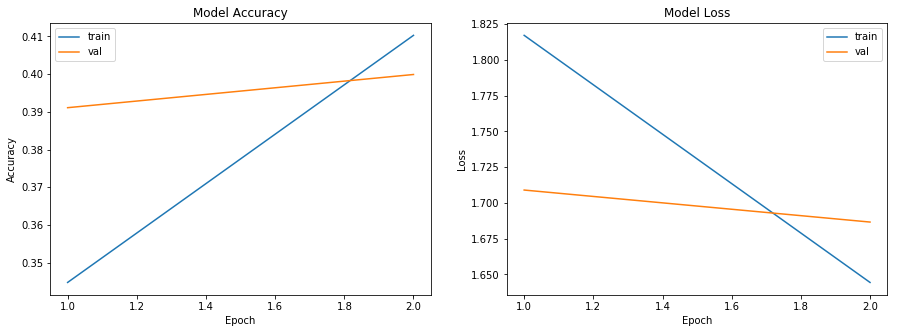

In [7]:
history = model.fit(x_train,y_train, epochs=2, batch_size=32, verbose=2, validation_split=0.2)
plot_model_history(history)



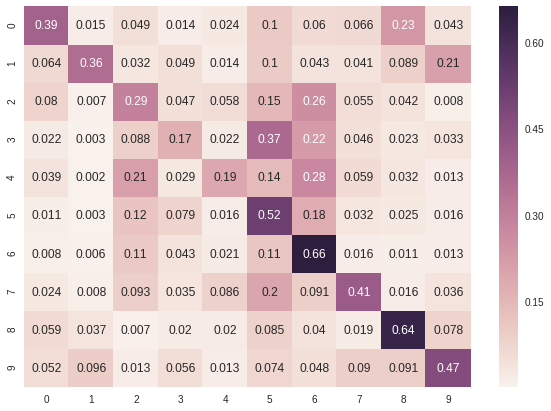

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
y_train_pred = model.predict(x_train, verbose=2)
y_train_pred = np.argmax(y_train_pred, axis=1)
y_test_pred = model.predict(x_test, verbose=2)
y_test_pred = np.argmax(y_test_pred, axis=1)

conf_matrix_train = confusion_matrix(y_train_label,y_train_pred)
conf_matrix_test = confusion_matrix(y_test_label,y_test_pred)




import seaborn as sn
import pandas as pd
conf_matrix_test = conf_matrix_test/1000
df_cm_test = pd.DataFrame(conf_matrix_test, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm_test, annot=True)



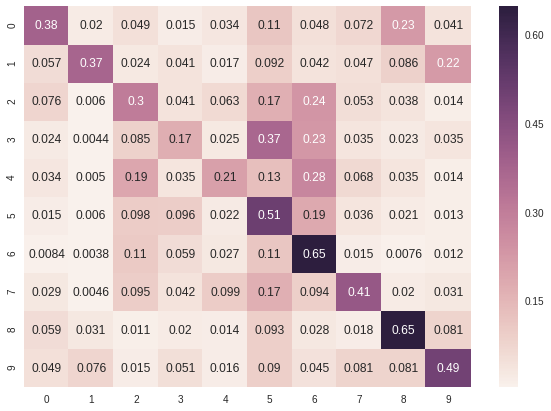

In [9]:
conf_matrix_train = conf_matrix_train/5000
df_cm_train = pd.DataFrame(conf_matrix_train, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm_train, annot=True)